<a href="https://colab.research.google.com/github/meghasri10/hello/blob/main/Copy_of_Student_academics_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Weather Dataset:
    Temperature  Humidity  WindSpeed
0            30        70         10
1            31        68         12
2            32        65         11
3            33        60         13
4            34        58         14
5            35        55         15
6            36        50         16
7            35        52         14
8            34        55         13
9            33        60         12
10           32        65         11
11           31        68         10

Input Shape: (9, 3, 3)
Output Shape: (9,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.4862
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.4977
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3601
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.3699
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3968
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.3746
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2719
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3504
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2848
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2391
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2412
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1909
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.2099
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1903
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1685
Epoch 16/200
2/2 ━━

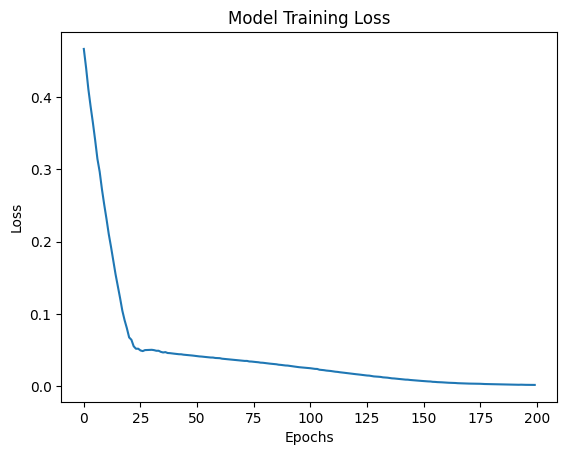

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# 2. Create sample weather dataset
# Columns: Temperature (°C), Humidity (%), Wind Speed (km/h)
data = {
    "Temperature": [30, 31, 32, 33, 34, 35, 36, 35, 34, 33, 32, 31],
    "Humidity":    [70, 68, 65, 60, 58, 55, 50, 52, 55, 60, 65, 68],
    "WindSpeed":   [10, 12, 11, 13, 14, 15, 16, 14, 13, 12, 11, 10]
}

df = pd.DataFrame(data)
print("\nWeather Dataset:")
print(df)

# 3. Normalize the dataset
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 4. Create sequences (weather cycle)
# Using past 3 days to predict next day's temperature
X = []
y = []

for i in range(3, len(scaled_data)):
    X.append(scaled_data[i-3:i])
    y.append(scaled_data[i, 0])  # Temperature column

X = np.array(X)
y = np.array(y)

print("\nInput Shape:", X.shape)
print("Output Shape:", y.shape)

# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Build LSTM Neural Network
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))

# 7. Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error'
)

model.summary()

# 8. Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=4,
    verbose=1
)

# 9. Evaluate the model
loss = model.evaluate(X_test, y_test)
print("\nTest Loss:", loss)

# 10. Predict next day temperature
last_3_days = scaled_data[-3:]
last_3_days = last_3_days.reshape((1, 3, 3))

predicted_temp_scaled = model.predict(last_3_days)

# Prepare array for inverse scaling
temp_array = np.zeros((1, 3))
temp_array[0, 0] = predicted_temp_scaled[0, 0]

predicted_temp_actual = scaler.inverse_transform(temp_array)

print("\nPredicted Next Day Temperature:")
print(predicted_temp_actual[0][0], "°C")

# 11. Plot training loss
plt.plot(history.history['loss'])
plt.title("Model Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()



